In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import openweathermapy.core as owm

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

date = time.strftime("%D")

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations. size should be 1500
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

## Perform API Calls

In [3]:
city_list = []
maxtemp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
country_list = []
date_list = []
lat_list = []
lon_list = []

# OpenWeatherMap API Key
api_key = api_keys.api_key
settings = {"appid": api_key}

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

for city in cities:
    try:
        city_removed_space = city.replace(" ", "+")        
        city_url = url + "&q=" + city_removed_space
        response = requests.get(city_url).json()
        
        city_list.append(response['name'])
        maxtemp_list.append(response['main']['temp'])
        humidity_list.append(response['main']['humidity'])
        cloudiness_list.append(response['clouds']['all'])
        windspeed_list.append(response['wind']['speed'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        lat_list.append(response['coord']['lat'])
        lon_list.append(response['coord']['lon'])
        
        print(f"Processing record {cities.index(city)} | {city}")
        print(f"   {city_url}")
        
    except KeyError:
        print(f"Processing record {cities.index(city)} | {city}")
        print(f"   {city_url}")
        print(f"   URL for record {cities.index(city)} does not work")

Processing record 0 | ushuaia
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=ushuaia
Processing record 1 | georgetown
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=georgetown
Processing record 2 | alibag
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=alibag
Processing record 3 | san patricio
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=san+patricio
Processing record 4 | tambopata
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=tambopata
   URL for record 4 does not work
Processing record 5 | barentsburg
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=barentsburg
   URL for record 5 does not work
Processing record 6 | vaini
   http://api.

Processing record 55 | avarua
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=avarua
Processing record 56 | vila
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=vila
Processing record 57 | hofn
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=hofn
Processing record 58 | launceston
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=launceston
Processing record 59 | grand river south east
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=grand+river+south+east
   URL for record 59 does not work
Processing record 60 | komsomolskiy
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=komsomolskiy
Processing record 61 | barmer
   http://api.openweathermap.org/

Processing record 109 | ostrovnoy
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=ostrovnoy
Processing record 110 | zastron
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=zastron
Processing record 111 | aktash
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=aktash
   URL for record 111 does not work
Processing record 112 | uaua
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=uaua
Processing record 113 | grindavik
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=grindavik
Processing record 114 | pisco
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=pisco
Processing record 115 | bose
   http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing record 163 | kavaratti
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=kavaratti
Processing record 164 | quesnel
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=quesnel
Processing record 165 | taoudenni
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=taoudenni
Processing record 166 | muroto
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=muroto
Processing record 167 | anchorage
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=anchorage
Processing record 168 | auki
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=auki
Processing record 169 | sitka
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9

Processing record 217 | ampanihy
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=ampanihy
Processing record 218 | kaitangata
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=kaitangata
Processing record 219 | riberalta
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=riberalta
Processing record 220 | vikulovo
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=vikulovo
Processing record 221 | tianpeng
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=tianpeng
Processing record 222 | hannibal
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=hannibal
Processing record 223 | yeppoon
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=080

Processing record 271 | xichang
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=xichang
Processing record 272 | sao joao do piaui
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=sao+joao+do+piaui
Processing record 273 | bandarbeyla
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=bandarbeyla
Processing record 274 | kutum
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=kutum
Processing record 275 | havoysund
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=havoysund
Processing record 276 | vestmanna
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=vestmanna
Processing record 277 | castanos
   http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing record 326 | kiama
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=kiama
Processing record 327 | flagstaff
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=flagstaff
Processing record 328 | codrington
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=codrington
Processing record 329 | souillac
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=souillac
Processing record 330 | san quintin
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=san+quintin
Processing record 331 | hambantota
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=hambantota
Processing record 332 | rawson
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing record 380 | shouguang
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=shouguang
Processing record 381 | luocheng
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=luocheng
Processing record 382 | wau
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=wau
   URL for record 382 does not work
Processing record 383 | nome
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=nome
Processing record 384 | yazd
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=yazd
Processing record 385 | sentyabrskiy
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=sentyabrskiy
   URL for record 385 does not work
Processing record 386 | fare
   http://api.openweatherma

Processing record 434 | vestmannaeyjar
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=vestmannaeyjar
Processing record 435 | lompoc
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=lompoc
Processing record 436 | isangel
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=isangel
Processing record 437 | acapulco
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=acapulco
Processing record 438 | porangatu
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=porangatu
Processing record 439 | cabedelo
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=cabedelo
Processing record 440 | waitati
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0

Processing record 488 | kristianstad
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=kristianstad
Processing record 489 | manakara
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=manakara
Processing record 490 | tuatapere
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=tuatapere
Processing record 491 | rio gallegos
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=rio+gallegos
Processing record 492 | bolu
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=bolu
Processing record 493 | storforshei
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=storforshei
Processing record 494 | teykovo
   http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing record 543 | northam
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=northam
Processing record 544 | ise
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=ise
Processing record 545 | kizukuri
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=kizukuri
Processing record 546 | chiang kham
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=chiang+kham
Processing record 547 | algiers
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=algiers
Processing record 548 | itarema
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=itarema
Processing record 549 | southbridge
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d

Processing record 597 | callaway
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=callaway
Processing record 598 | kupang
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=kupang
Processing record 599 | nanakuli
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=nanakuli
Processing record 600 | gravelbourg
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=gravelbourg
Processing record 601 | samoylovka
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=samoylovka
Processing record 602 | yavas
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a317164d60b9b77c4374b6ba0&q=yavas
Processing record 603 | veraval
   http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0805b56a3

In [4]:
city_data_df = pd.DataFrame({
    "City": city_list,
    "Cloudiness": cloudiness_list,    
    "Country": country_list,
    "Date": date_list,
    "Humidity": humidity_list,
    "Lat": lat_list,
    "Lng": lon_list, 
    "Max Temp": maxtemp_list,
    "Wind Speed": windspeed_list,
})

output_path = "city_data_df.csv"
city_data_df.to_csv(output_path, index=False, header=True) 

city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,20,AR,1532480400,64,-54.81,-68.31,37.40,4.70
1,Georgetown,75,GY,1532480400,94,6.80,-58.16,77.00,11.41
2,Alibag,75,IN,1532478600,83,18.64,72.88,82.40,9.17
3,San Patricio,92,PY,1532482242,97,-26.98,-56.83,53.79,2.48
4,Vaini,100,IN,1532482243,98,15.34,74.49,71.97,7.85
5,Kieta,88,PG,1532482243,100,-6.22,155.63,78.45,3.15
6,Ahipara,32,NZ,1532482243,85,-35.17,173.16,56.49,10.76
7,Richards Bay,0,ZA,1532482244,93,-28.77,32.06,54.06,5.84
8,Esquias,75,HN,1532480280,42,14.73,-87.37,82.40,3.36
9,Ust-Kulom,80,RU,1532482244,54,61.69,53.69,68.28,4.83


In [5]:
city_data_df.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

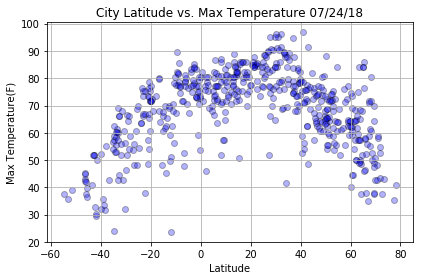

In [6]:
#Latitude vs Temperature Plot
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]

plt.title(f'City Latitude vs. Max Temperature {date}')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.grid()
plt.tight_layout()

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.30)

plt.savefig("LatTemp.png")
plt.show()

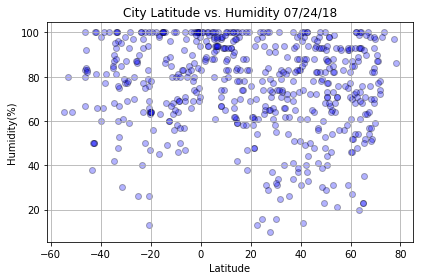

In [7]:
#Latitude vs Humidity Plot
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

plt.title(f'City Latitude vs. Humidity {date}')
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.grid()
plt.tight_layout()

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.30)

plt.savefig("LatHum.png")
plt.show()

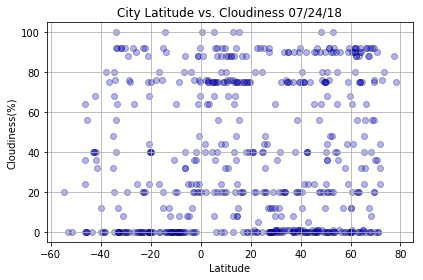

In [8]:
#Latitude vs Cloudiness Plot
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

plt.title(f'City Latitude vs. Cloudiness {date}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.grid()
plt.tight_layout()

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.30)

plt.savefig("LatCloud.png")
plt.show()

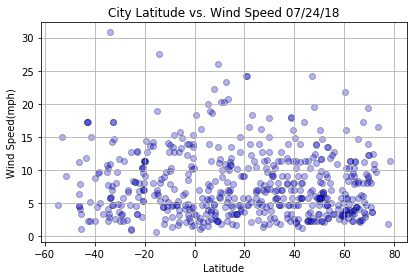

In [9]:
#Latitude vs Wind Speed Plot
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]

plt.title(f'City Latitude vs. Wind Speed {date}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

plt.grid()
plt.tight_layout()

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.30)

plt.savefig("LatWind.png")
plt.show()

In [10]:
#Trends
print("Trend 1")
print("There is a positive correlation between latitude and temperature as you move from a lower latitude to a higher latitude towards the equator. However, when you reach a latitude of about 20, the correlation becomes negative and temperature decreases as latitude increases.")
print("-------------------------------")
print("Trend 2")
print("In general, cities near the equator, or the latitude of 0, have a higher humidity %. As you move away from the equator, there is a wider ranger of humidity levels.")
print("-------------------------------")
print("Trend 3")
print("Judging from the latitude/cloudiness % scatter plot, there is a wide range of cloudiness levels within the different latitudes. However, most cities seem to fall on the more extreme end of the cloudiness % scale, either very low or high cloudiness %.")

Trend 1
There is a positive correlation between latitude and temperature as you move from a lower latitude to a higher latitude towards the equator. However, when you reach a latitude of about 20, the correlation becomes negative and temperature decreases as latitude increases.
-------------------------------
Trend 2
In general, cities near the equator, or the latitude of 0, have a higher humidity %. As you move away from the equator, there is a wider ranger of humidity levels.
-------------------------------
Trend 3
Judging from the latitude/cloudiness % scatter plot, there is a wide range of cloudiness levels within the different latitudes. However, most cities seem to fall on the more extreme end of the cloudiness % scale, either very low or high cloudiness %.
